<a href="https://colab.research.google.com/github/YoonTae-Hwang/trading_repository/blob/master/HW_DEEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.keras.utils
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.cifar10 import load_data
(train_X, train_Y), (test_X, test_Y) = load_data()

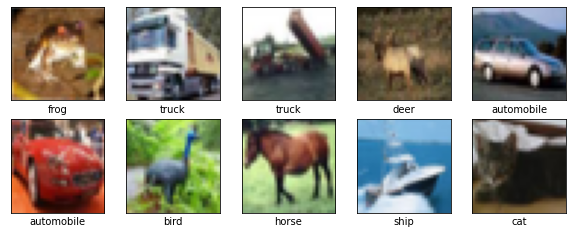

In [65]:
class_names = ['frog','truck','truck','deer','automobile',
               'automobile','bird','horse','ship','cat']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_X[i])
    plt.xlabel(class_names[i])

plt.show()

In [0]:
def preprocessing( train_X, test_X, train_Y, test_Y ):

  train_X = train_X.reshape(-1, 32,32,3)
  test_X = test_X.reshape(-1, 32,32,3)

  train_X = ( train_X/255.0 )
  test_X  = ( test_X /255.0 )

  return train_X, test_X, train_Y, test_Y

[train_X, test_X, train_Y, test_Y] = preprocessing( train_X, test_X, train_Y, test_Y)


In [61]:
train_X.shape

(50000, 32, 32, 3)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32,32,3), kernel_size=(5,5), filters=6, padding = "VALID", strides = (1,1),  activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2), pool_size  =(2,2) ),

    tf.keras.layers.Conv2D(kernel_size=(5,5), filters=16 , strides = (1,1),  padding = "VALID", activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_16 (Dense)             (None, 84)               

In [68]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 128, validation_split = 0.25)
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = "val_loss")]

Epoch 1/25
293/293 [==============================] - 2s 6ms/step - loss: 1.7924 - accuracy: 0.3496 - val_loss: 1.5772 - val_accuracy: 0.4321
Epoch 2/25
293/293 [==============================] - 1s 5ms/step - loss: 1.4960 - accuracy: 0.4621 - val_loss: 1.4254 - val_accuracy: 0.4892
Epoch 3/25
293/293 [==============================] - 1s 5ms/step - loss: 1.3898 - accuracy: 0.5030 - val_loss: 1.3692 - val_accuracy: 0.5145
Epoch 4/25
293/293 [==============================] - 1s 5ms/step - loss: 1.3291 - accuracy: 0.5247 - val_loss: 1.3404 - val_accuracy: 0.5234
Epoch 5/25
293/293 [==============================] - 2s 5ms/step - loss: 1.2661 - accuracy: 0.5481 - val_loss: 1.3180 - val_accuracy: 0.5318
Epoch 6/25
293/293 [==============================] - 2s 5ms/step - loss: 1.2280 - accuracy: 0.5606 - val_loss: 1.2976 - val_accuracy: 0.5437
Epoch 7/25
293/293 [==============================] - 2s 5ms/step - loss: 1.1889 - accuracy: 0.5776 - val_loss: 1.2236 - val_accuracy: 0.5690
Epoch 

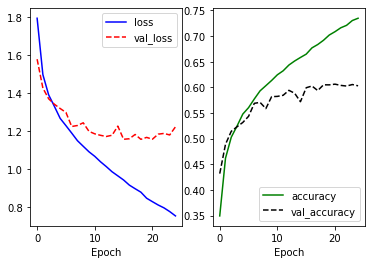

In [69]:
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label = "loss")
plt.plot(history.history["val_loss"], "r--", label = "val_loss")
plt.xlabel("Epoch")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "g-", label = "accuracy")
plt.plot(history.history["val_accuracy"], "k--", label = "val_accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show()


In [150]:
model.evaluate(test_X, test_Y, verbose = 0)

[1.2131794691085815, 0.6035000085830688]

In [163]:
np.argmax(predictions[i])

2

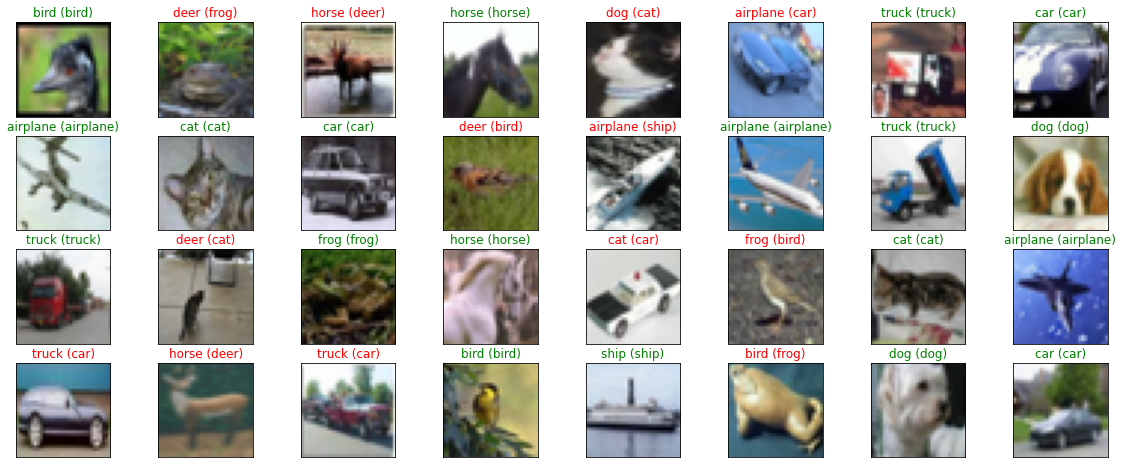

In [171]:
label_name = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

predictions = model.predict(test_X)

fig = plt.figure(figsize = (20, 8))
for i, idx in enumerate(np.random.choice(test_X.shape[0], size = 32, replace = False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(test_X[idx]))
  pred_idx = np.argmax(predictions[idx])
  true_idx = test_Y[idx][0]
  ax.set_title("{} ({})".format(label_name[pred_idx], label_name[true_idx]), 
               color = ("green" if pred_idx == true_idx else "red"))


In [71]:
#model2
model2 = tf.keras.Sequential([
                              
    tf.keras.layers.Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=96, padding = "SAME", strides = (2,2),  activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2), pool_size = (2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding = "SAME",  activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2), pool_size = (2,2)),
 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=384, padding = "SAME",  activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2), pool_size = (2,2)),
 
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=384, padding = "SAME",  activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=384, padding = "SAME",  activation="relu"),
    tf.keras.layers.MaxPool2D(strides=(2,2), pool_size = (2,2)),



    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=384, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=1000, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])

model2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 256)         221440    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 384)         885120    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 384)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 384)        

In [72]:
history = model2.fit(train_X, train_Y, epochs = 30, batch_size = 128, validation_split = 0.25)
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, monitor = "val_loss")]

Epoch 1/30
293/293 [==============================] - 4s 15ms/step - loss: 2.0098 - accuracy: 0.2021 - val_loss: 1.6737 - val_accuracy: 0.3458
Epoch 2/30
293/293 [==============================] - 4s 13ms/step - loss: 1.5335 - accuracy: 0.4189 - val_loss: 1.3604 - val_accuracy: 0.5112
Epoch 3/30
293/293 [==============================] - 4s 13ms/step - loss: 1.2608 - accuracy: 0.5476 - val_loss: 1.2433 - val_accuracy: 0.5542
Epoch 4/30
293/293 [==============================] - 4s 13ms/step - loss: 1.0904 - accuracy: 0.6164 - val_loss: 1.0923 - val_accuracy: 0.6177
Epoch 5/30
293/293 [==============================] - 4s 14ms/step - loss: 0.9716 - accuracy: 0.6626 - val_loss: 1.1018 - val_accuracy: 0.6225
Epoch 6/30
293/293 [==============================] - 4s 14ms/step - loss: 0.8915 - accuracy: 0.6924 - val_loss: 1.0203 - val_accuracy: 0.6521
Epoch 7/30
293/293 [==============================] - 4s 14ms/step - loss: 0.7996 - accuracy: 0.7248 - val_loss: 1.0006 - val_accuracy: 0.6606

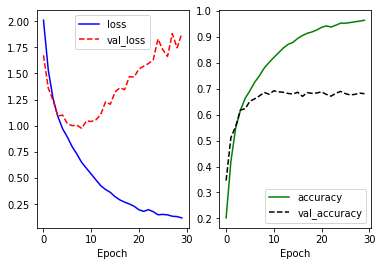

In [73]:
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label = "loss")
plt.plot(history.history["val_loss"], "r--", label = "val_loss")
plt.xlabel("Epoch")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "g-", label = "accuracy")
plt.plot(history.history["val_accuracy"], "k--", label = "val_accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.show()


In [158]:
model2.evaluate(test_X, test_Y, verbose = 0)

[1.9620189666748047, 0.6777999997138977]

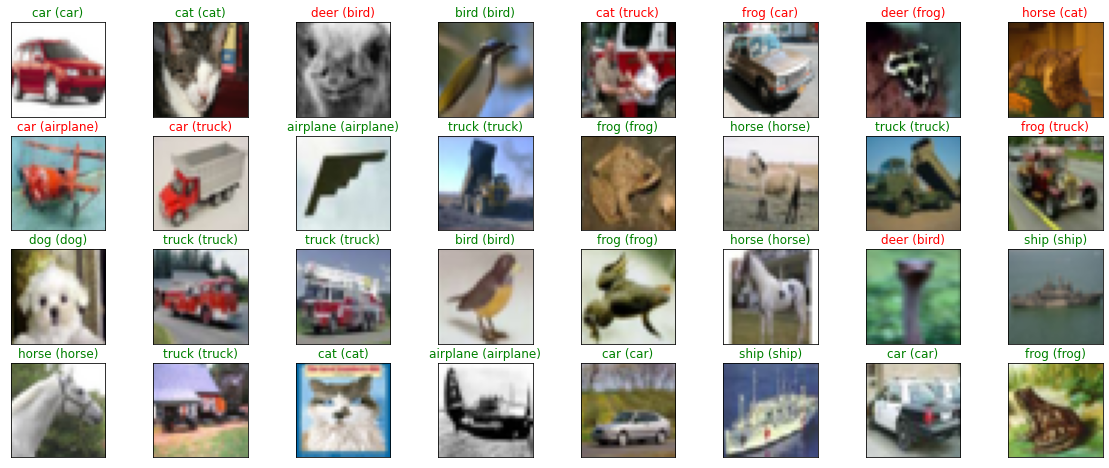

In [173]:
label_name = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

predictions = model2.predict(test_X)

fig = plt.figure(figsize = (20, 8))
for i, idx in enumerate(np.random.choice(test_X.shape[0], size = 32, replace = False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(test_X[idx]))
  pred_idx = np.argmax(predictions[idx])
  true_idx = test_Y[idx][0]
  ax.set_title("{} ({})".format(label_name[pred_idx], label_name[true_idx]), 
               color = ("green" if pred_idx == true_idx else "red"))
